In [84]:
!pwd

/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/notebooks/Unet/v4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
DATA_PATH = "notebooks/from_db/Unet/v4/"

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")

In [3]:
data = pd.read_csv(BASE_PATH + DATA_PATH + "pooling_layers/params_best_epoch.csv")
metrics = pd.read_csv(BASE_PATH + DATA_PATH + "pooling_layers/train_metrics.csv")
data["name"] = data["name"].apply(lambda x: x[x.index("num_convs") :])

data["L_1"] = 128 / (data["arc_stride_1"] ** data["arc_num_conv1"])
data["vol_1"] = data["L_1"] * data["arc_filters"]

data["L_2"] = data["L_1"] / (data["arc_stride_2"] ** data["arc_num_conv2"])
data["vol_2"] = data["L_2"] * data["arc_rank"]
data["vol_eff"] = data["vol_2"] / (128 * 4)


data["vol_ratio"] = data["vol_2"] / data["vol_1"]

data["latent_ratio"] = data["arc_latent_dim"] / data["vol_2"]
data["latent_ratio"].astype("category")
data["vol_ratio"].astype("category")

0      1.000
1      1.000
2      1.000
3      1.000
4      0.500
5      0.500
6      0.500
7      0.500
8      0.500
9      0.500
10     0.500
11     0.500
12     0.250
13     0.250
14     0.250
15     0.250
16     0.500
17     0.500
18     0.500
19     0.500
20     0.250
21     0.250
22     0.250
23     0.250
24     0.250
25     0.250
26     0.250
27     0.250
28     0.125
29     0.125
30     0.125
31     0.125
32     1.000
33     1.000
34     1.000
35     1.000
36     0.500
37     0.500
38     0.500
39     0.500
40     0.500
41     0.500
42     0.500
43     0.500
44     0.250
45     0.250
46     0.250
47     0.250
48     0.500
49     0.500
50     0.500
51     0.500
52     0.250
53     0.250
54     0.250
55     0.250
56     0.250
57     0.250
58     0.250
59     0.250
60     0.125
61     0.125
62     0.125
63     0.125
64     1.000
65     1.000
66     1.000
67     1.000
68     0.500
69     0.500
70     0.500
71     0.500
72     0.500
73     0.500
74     0.500
75     0.500
76     0.250

In [4]:
data.shape

(128, 35)

In [5]:
print(f'"L_1": {data["L_1"].unique()}')
print(f'"L_2": {data["L_2"].unique()}')
print(f'"vol_1": {data["vol_1"].unique()}')
print(f'"vol_2": {data["vol_2"].unique()}')
print(f'"arc_filters": {data["arc_filters"].unique()}')
print(f'"arc_rank": {data["arc_rank"].unique()}')
print(f'"arc_latent_dim": {data["arc_latent_dim"].unique()}')
print(f'"arc_stride_1": {data["arc_stride_1"].unique()}')
print(f'"arc_stride_2": {data["arc_stride_2"].unique()}')
print(f'"arc_num_conv1": {data["arc_num_conv1"].unique()}')

"L_1": [32. 16.]
"L_2": [8. 4. 2.]
"vol_1": [128. 256.  64.]
"vol_2": [128.  64.  32.  16.]
"arc_filters": [4 8]
"arc_rank": [16  8]
"arc_latent_dim": [16 32 64  8]
"arc_stride_1": [2]
"arc_stride_2": [2]
"arc_num_conv1": [2 3]


In [6]:
data.query("arc_num_conv1 == 2")

,run_uuid,name,best_epoch,arc_filters,arc_rank,arc_kernel,arc_stride_1,arc_stride_2,arc_num_conv1,arc_num_conv2,arc_latent_dim,arc_skip_conn,hyp_lr,hyp_output_th,hyp_scheduler,best_epoch.1,train_loss,train_Accuracy,train_Accuracy_seq,train_F1,valid_loss,valid_Accuracy,valid_Accuracy_seq,valid_F1,test_loss,test_Accuracy,test_Accuracy_seq,test_F1,L_1,vol_1,L_2,vol_2,vol_eff,vol_ratio,latent_ratio
0,3980dfe55c2d43cab8287f8213165bc4,num_convs-2-2-f4-r16-ld16,16,4,16,3,2,2,2,2,16,0,0.001,0.5,none,16,0.137466,0.818396,0.000000,0.765335,0.138648,0.817044,0.0,0.753580,0.142501,0.811195,0.00000,0.748767,32.0,128.0,8.0,128.0,0.2500,1.000,0.1250
1,9a2352b1ee96461fa9dabb7fc8107f13,num_convs-2-2-f4-r16-ld32,19,4,16,3,2,2,2,2,32,0,0.001,0.5,none,19,0.137344,0.820876,0.000000,0.769002,0.137147,0.820014,0.0,0.759907,0.141894,0.813485,0.00000,0.755841,32.0,128.0,8.0,128.0,0.2500,1.000,0.2500
2,bedf399ec01a4e7aab7f66529e3bedce,num_convs-2-2-f4-r16-ld64,16,4,16,3,2,2,2,2,64,0,0.001,0.5,none,16,0.133261,0.821380,0.000000,0.774400,0.135283,0.818738,0.0,0.760169,0.138719,0.815135,0.00000,0.759855,32.0,128.0,8.0,128.0,0.2500,1.000,0.5000
3,6780cc1b018c4a7aabdb56225349c015,num_convs-2-2-f4-r16-ld8,18,4,16,3,2,2,2,2,8,0,0.001,0.5,none,18,0.134085,0.819882,0.000000,0.771150,0.134452,0.820093,0.0,0.758246,0.139696,0.813030,0.00000,0.752018,32.0,128.0,8.0,128.0,0.2500,1.000,0.0625
4,c4bf3e187f01434e935698e381660655,num_convs-2-2-f4-r8-ld16,19,4,8,3,2,2,2,2,16,0,0.001,0.5,none,19,0.140849,0.810488,0.000000,0.745901,0.138104,0.816984,0.0,0.745837,0.142761,0.812214,0.00000,0.746439,32.0,128.0,8.0,64.0,0.1250,0.500,0.2500
5,18e921f949b04fbeba3580936263b848,num_convs-2-2-f4-r8-ld32,16,4,8,3,2,2,2,2,32,0,0.001,0.5,none,16,0.137362,0.814429,0.000000,0.755437,0.134995,0.819774,0.0,0.753992,0.136918,0.817299,0.00000,0.757133,32.0,128.0,8.0,64.0,0.1250,0.500,0.5000
6,9f0ddbf36b3f400faee1e594986a0179,num_convs-2-2-f4-r8-ld64,13,4,8,3,2,2,2,2,64,0,0.001,0.5,none,13,0.139161,0.812259,0.000000,0.751774,0.137291,0.815828,0.0,0.743659,0.142001,0.808417,0.00000,0.737878,32.0,128.0,8.0,64.0,0.1250,0.500,1.0000
7,efc1dd1ce1fd4fdea83cf937e8327f9b,num_convs-2-2-f4-r8-ld8,19,4,8,3,2,2,2,2,8,0,0.001,0.5,none,19,0.142208,0.804413,0.000000,0.736529,0.136820,0.816506,0.0,0.745586,0.139793,0.811035,0.00000,0.743369,32.0,128.0,8.0,64.0,0.1250,0.500,0.1250
8,9f875182af2045f3bd2b277a51537d4b,num_convs-2-2-f8-r16-ld16,18,8,16,3,2,2,2,2,16,0,0.001,0.5,none,18,0.117219,0.845298,0.000000,0.818588,0.130360,0.826840,0.0,0.781771,0.127634,0.826820,0.00000,0.789281,32.0,256.0,8.0,128.0,0.2500,0.500,0.1250
9,74dd95c1c6de42178d82b6a226fbf4b2,num_convs-2-2-f8-r16-ld32,17,8,16,3,2,2,2,2,32,0,0.001,0.5,none,17,0.121067,0.839525,0.000000,0.808736,0.132625,0.825195,0.0,0.778764,0.132070,0.822358,0.00000,0.781597,32.0,256.0,8.0,128.0,0.2500,0.500,0.2500


In [7]:
data_c_skips = data[data["arc_skip_conn"] == 1]
data_c_no_skips = data[data["arc_skip_conn"] == 0]
# data_pool_skips = data_pool[data_pool['arc_skip_conn'] == 1]
# data_pool_no_skips = data_pool[data_pool['arc_skip_conn'] == 0]

In [8]:
columns = [
    "name",
    "run_uuid",
    "arc_skip_conn",
    "arc_filters",
    "arc_rank",
    "vol_2",
    "arc_latent_dim",
    "arc_num_conv1",
    "arc_num_conv2",
    "L_1",
    "L_2",
    "vol_1",
    "vol_eff",
    "vol_ratio",
    "latent_ratio",
    "best_epoch",
    "train_Accuracy",
    "valid_Accuracy",
    "test_Accuracy",
]
print(data.columns)

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_latent_dim', 'arc_skip_conn', 'hyp_lr',
       'hyp_output_th', 'hyp_scheduler', 'best_epoch.1', 'train_loss',
       'train_Accuracy', 'train_Accuracy_seq', 'train_F1', 'valid_loss',
       'valid_Accuracy', 'valid_Accuracy_seq', 'valid_F1', 'test_loss',
       'test_Accuracy', 'test_Accuracy_seq', 'test_F1', 'L_1', 'vol_1', 'L_2',
       'vol_2', 'vol_eff', 'vol_ratio', 'latent_ratio'],
      dtype='object')


In [9]:
data[columns].sort_values(
    ["valid_Accuracy", "arc_filters", "arc_rank", "arc_latent_dim", "arc_skip_conn"]
)

,name,run_uuid,arc_skip_conn,arc_filters,arc_rank,vol_2,arc_latent_dim,arc_num_conv1,arc_num_conv2,L_1,L_2,vol_1,vol_eff,vol_ratio,latent_ratio,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
39,num_convs-3-2-f4-r8-ld8,438ef499751e4e78aa89872c506317ad,0,4,8,32.0,8,3,2,16.0,4.0,64.0,0.06250,0.500,0.2500,10,0.798554,0.811314,0.802221
37,num_convs-3-2-f4-r8-ld32,d43e5624ebae4ca2aa49e176ab3c7dee,0,4,8,32.0,32,3,2,16.0,4.0,64.0,0.06250,0.500,1.0000,17,0.800178,0.812131,0.801791
38,num_convs-3-2-f4-r8-ld64,4fb9a466b08d40778eeea4e2036f5234,0,4,8,32.0,64,3,2,16.0,4.0,64.0,0.06250,0.500,2.0000,18,0.802270,0.812689,0.802322
52,num_convs-3-3-f4-r8-ld16,227f9d155a8848fdabfdcc5a6678dfd6,0,4,8,16.0,16,3,3,16.0,2.0,64.0,0.03125,0.250,1.0000,17,0.800335,0.812789,0.805108
36,num_convs-3-2-f4-r8-ld16,7380cd9986124171a424e66704306ead,0,4,8,32.0,16,3,2,16.0,4.0,64.0,0.06250,0.500,0.5000,13,0.803445,0.813526,0.803837
48,num_convs-3-3-f4-r16-ld16,3015c2d60b0a4b8eb02dcc02dab01274,0,4,16,32.0,16,3,3,16.0,2.0,64.0,0.06250,0.500,0.5000,19,0.803907,0.813546,0.803181
50,num_convs-3-3-f4-r16-ld64,61f3fe4663b742f2af2951f263a00324,0,4,16,32.0,64,3,3,16.0,2.0,64.0,0.06250,0.500,2.0000,16,0.802265,0.813636,0.806826
32,num_convs-3-2-f4-r16-ld16,af1d1398d7064856b75106705d89449b,0,4,16,64.0,16,3,2,16.0,4.0,64.0,0.12500,1.000,0.2500,17,0.802976,0.813716,0.808038
21,num_convs-2-3-f4-r8-ld32,d1aeb152ab1e49dd9e1f663db45fdb68,0,4,8,32.0,32,2,3,32.0,4.0,128.0,0.06250,0.250,1.0000,19,0.805804,0.813975,0.808425
51,num_convs-3-3-f4-r16-ld8,c660be71044049a3a346b92f9fc4b6b5,0,4,16,32.0,8,3,3,16.0,2.0,64.0,0.06250,0.500,0.2500,19,0.803024,0.813995,0.803719


## REVISAR DATOS ARRIBA

In [94]:
columns

['name',
 'run_uuid',
 'arc_skip_conn',
 'arc_filters',
 'arc_rank',
 'vol_2',
 'arc_latent_dim',
 'arc_num_conv1',
 'arc_num_conv2',
 'L_1',
 'L_2',
 'vol_1',
 'vol_eff',
 'vol_ratio',
 'latent_ratio',
 'best_epoch',
 'train_Accuracy',
 'valid_Accuracy',
 'test_Accuracy']

In [95]:
data.sample().to_clipboard()

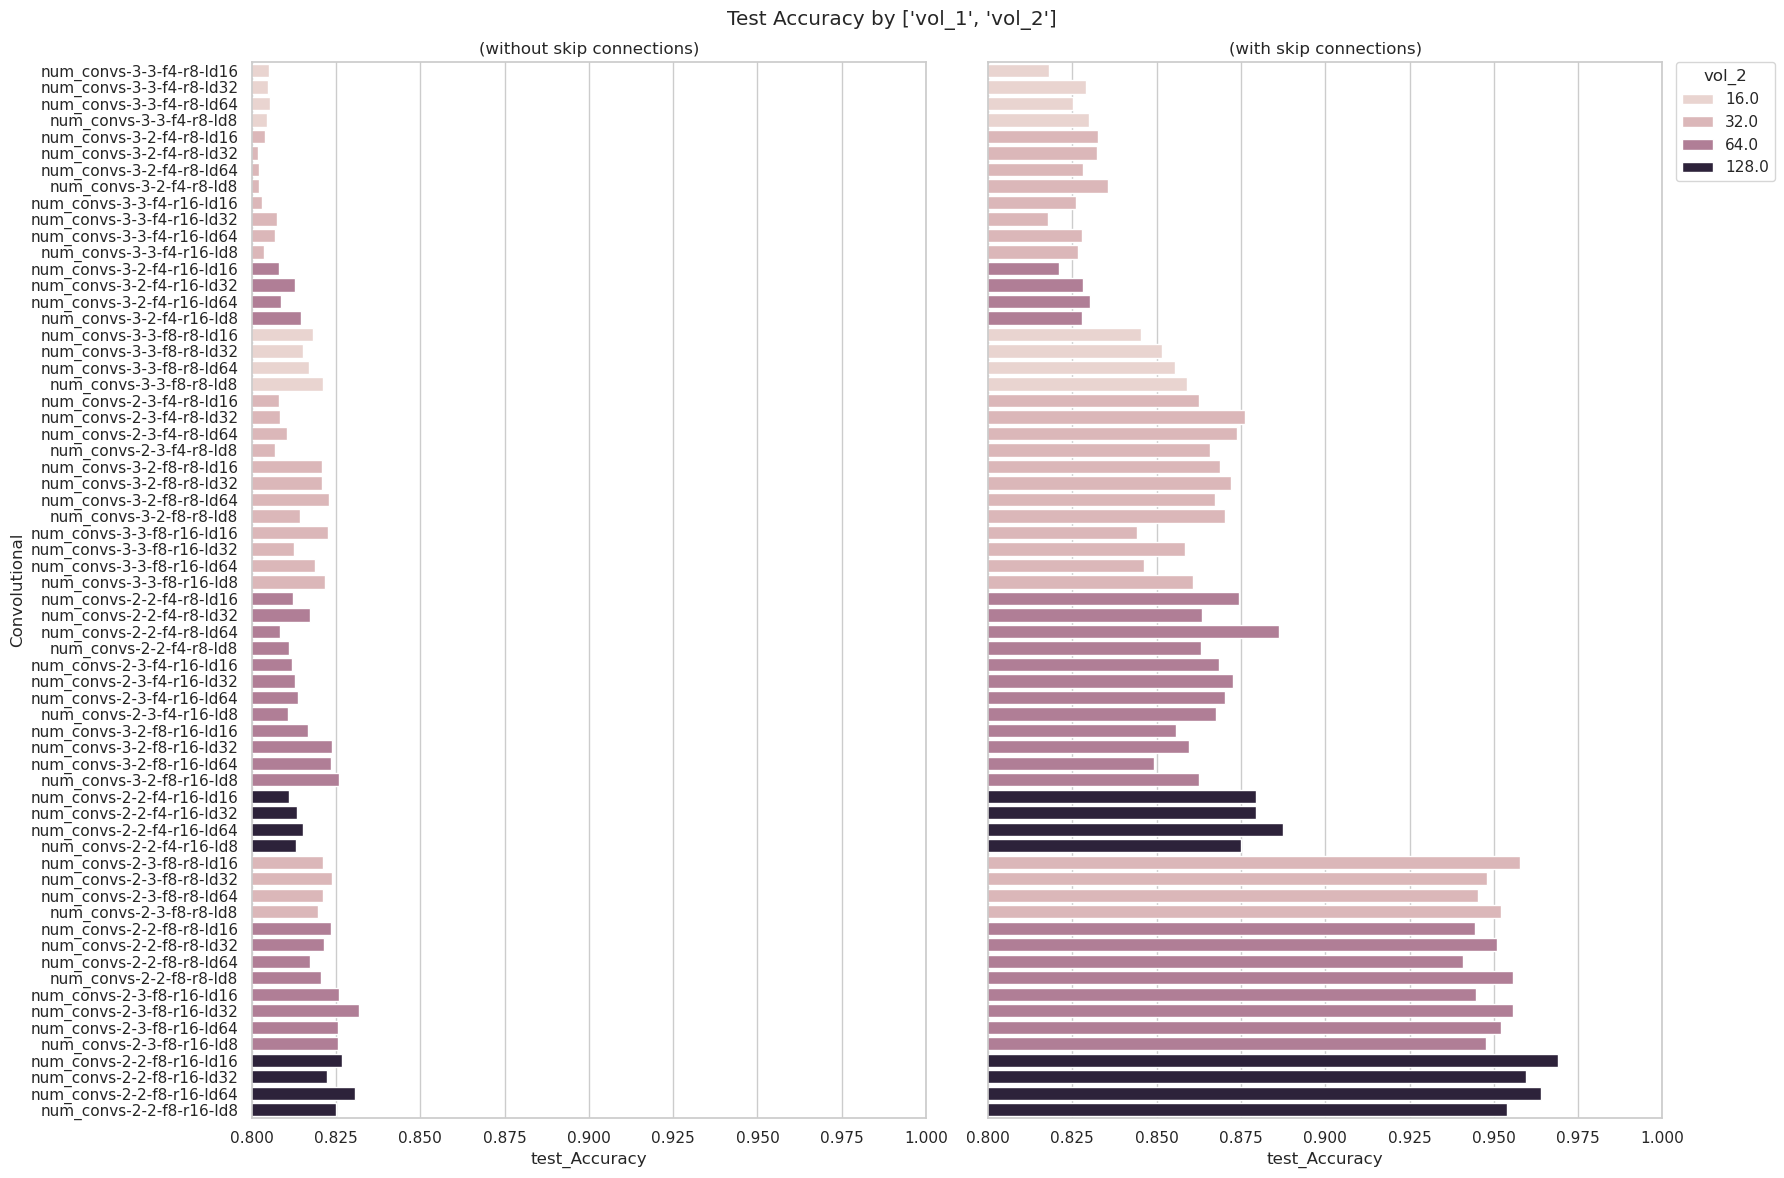

<Figure size 640x480 with 0 Axes>

In [96]:
order = [
    "vol_1",
    "vol_2",
]
hue = "vol_2"

fig, axes = plt.subplots(1, 2, figsize=(18, 12), sharex=True)
g = sns.barplot(
    data=data_c_no_skips.sort_values(by=order),
    x="test_Accuracy",
    y="name",
    hue=hue,
    legend=False,
    ax=axes[0],
)
g.set_title("(without skip connections)")
g.set_xlim([0.8, 1])

g.set(ylabel="Convolutional")

g = sns.barplot(
    data=data_c_skips.sort_values(by=order),
    x="test_Accuracy",
    y="name",
    hue=hue,
    ax=axes[1],
)
g.set_title("(with skip connections)")
g.legend(title=hue, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel="")

g.set_xlim([0.8, 1])
fig.suptitle(f"Test Accuracy by {order}")
fig.tight_layout()
plt.show()
plt.clf()

# g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False, ax=axes[1, 0])
# g.set_xlim([0.8, 1])
# g.set(ylabel='Avg pooling')

# g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False,  ax=axes[1, 1])
# g.set_yticklabels([])
# g.set(ylabel='')

In [10]:
cols = columns[:-4]
metrics_skips = pd.merge(
    metrics,
    data_c_skips[cols],
    how="left",
    left_on="run_uuid",
    right_on="run_uuid",
)
metrics_no_skips = pd.merge(
    metrics,
    data_c_no_skips[cols],
    how="left",
    left_on="run_uuid",
    right_on="run_uuid",
)

Text(0.5, 0.98, 'Convolutional')

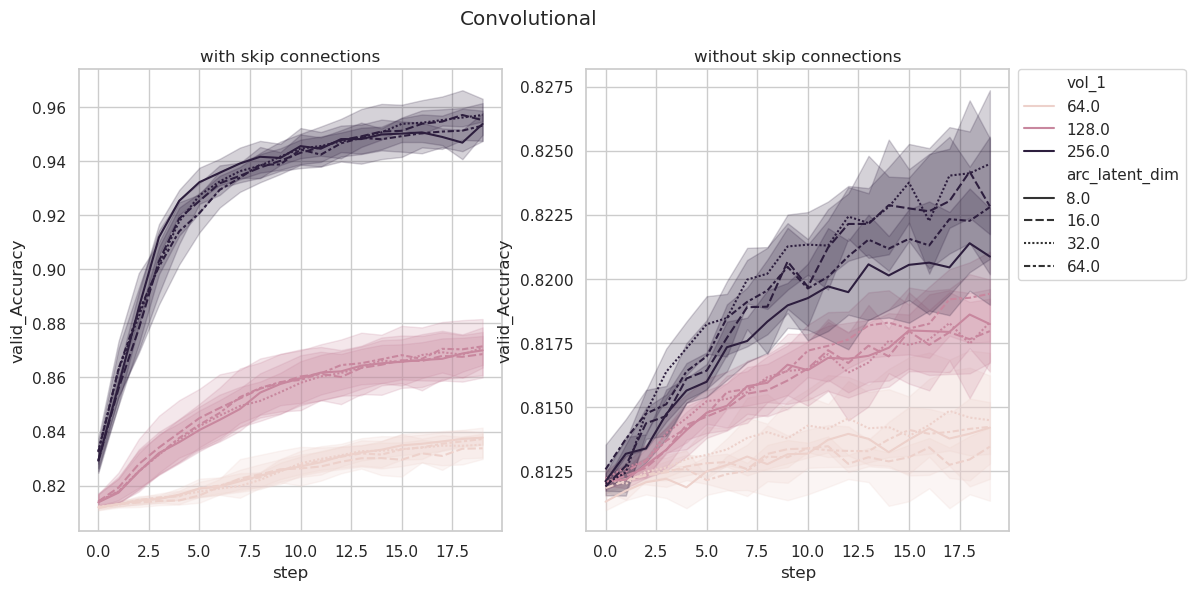

In [98]:
style = "arc_latent_dim"
hue = "vol_1"
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
g = sns.lineplot(
    data=metrics_skips,
    x="step",
    y="valid_Accuracy",
    style=style,
    hue=hue,
    ax=ax[0],
    legend=False,
)
# g.grid()
g.set_title("with skip connections")

f = sns.lineplot(
    data=metrics_no_skips,
    x="step",
    y="valid_Accuracy",
    style=style,
    hue=hue,
    ax=ax[1],
)
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# f.grid()
f.set_title("without skip connections")
fig.suptitle("Convolutional")

Text(0.5, 0.98, 'Convolutional')

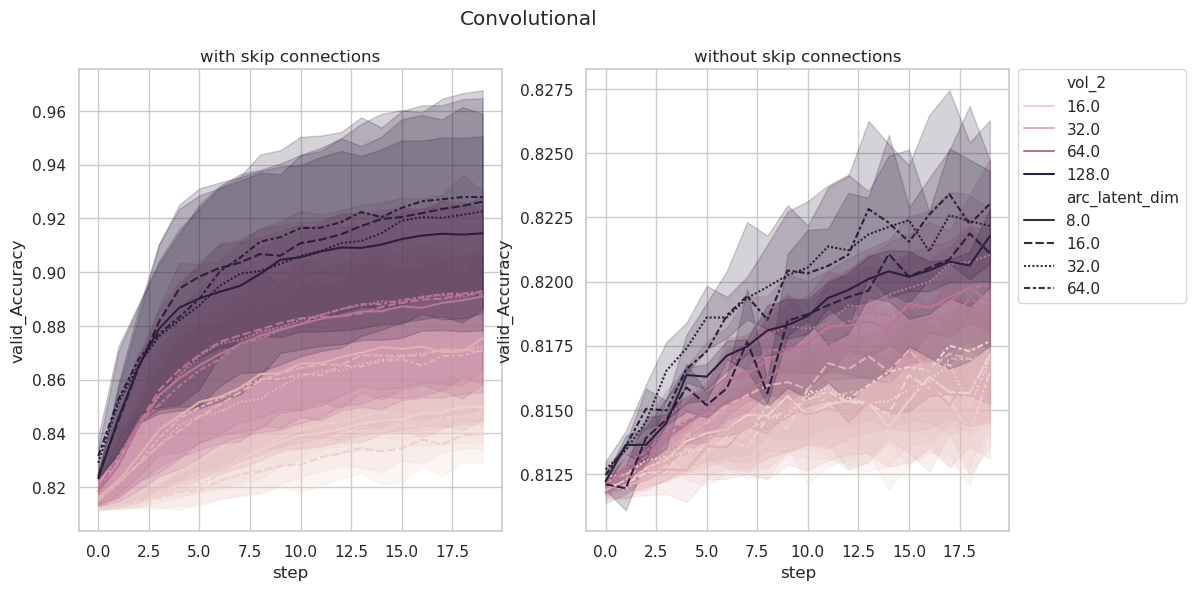

In [99]:
style = "arc_latent_dim"
hue = "vol_2"
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
g = sns.lineplot(
    data=metrics_skips,
    x="step",
    y="valid_Accuracy",
    style=style,
    hue=hue,
    ax=ax[0],
    legend=False,
)
# g.grid()
g.set_title("with skip connections")

f = sns.lineplot(
    data=metrics_no_skips,
    x="step",
    y="valid_Accuracy",
    style=style,
    hue=hue,
    ax=ax[1],
)
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# f.grid()
f.set_title("without skip connections")
fig.suptitle("Convolutional")

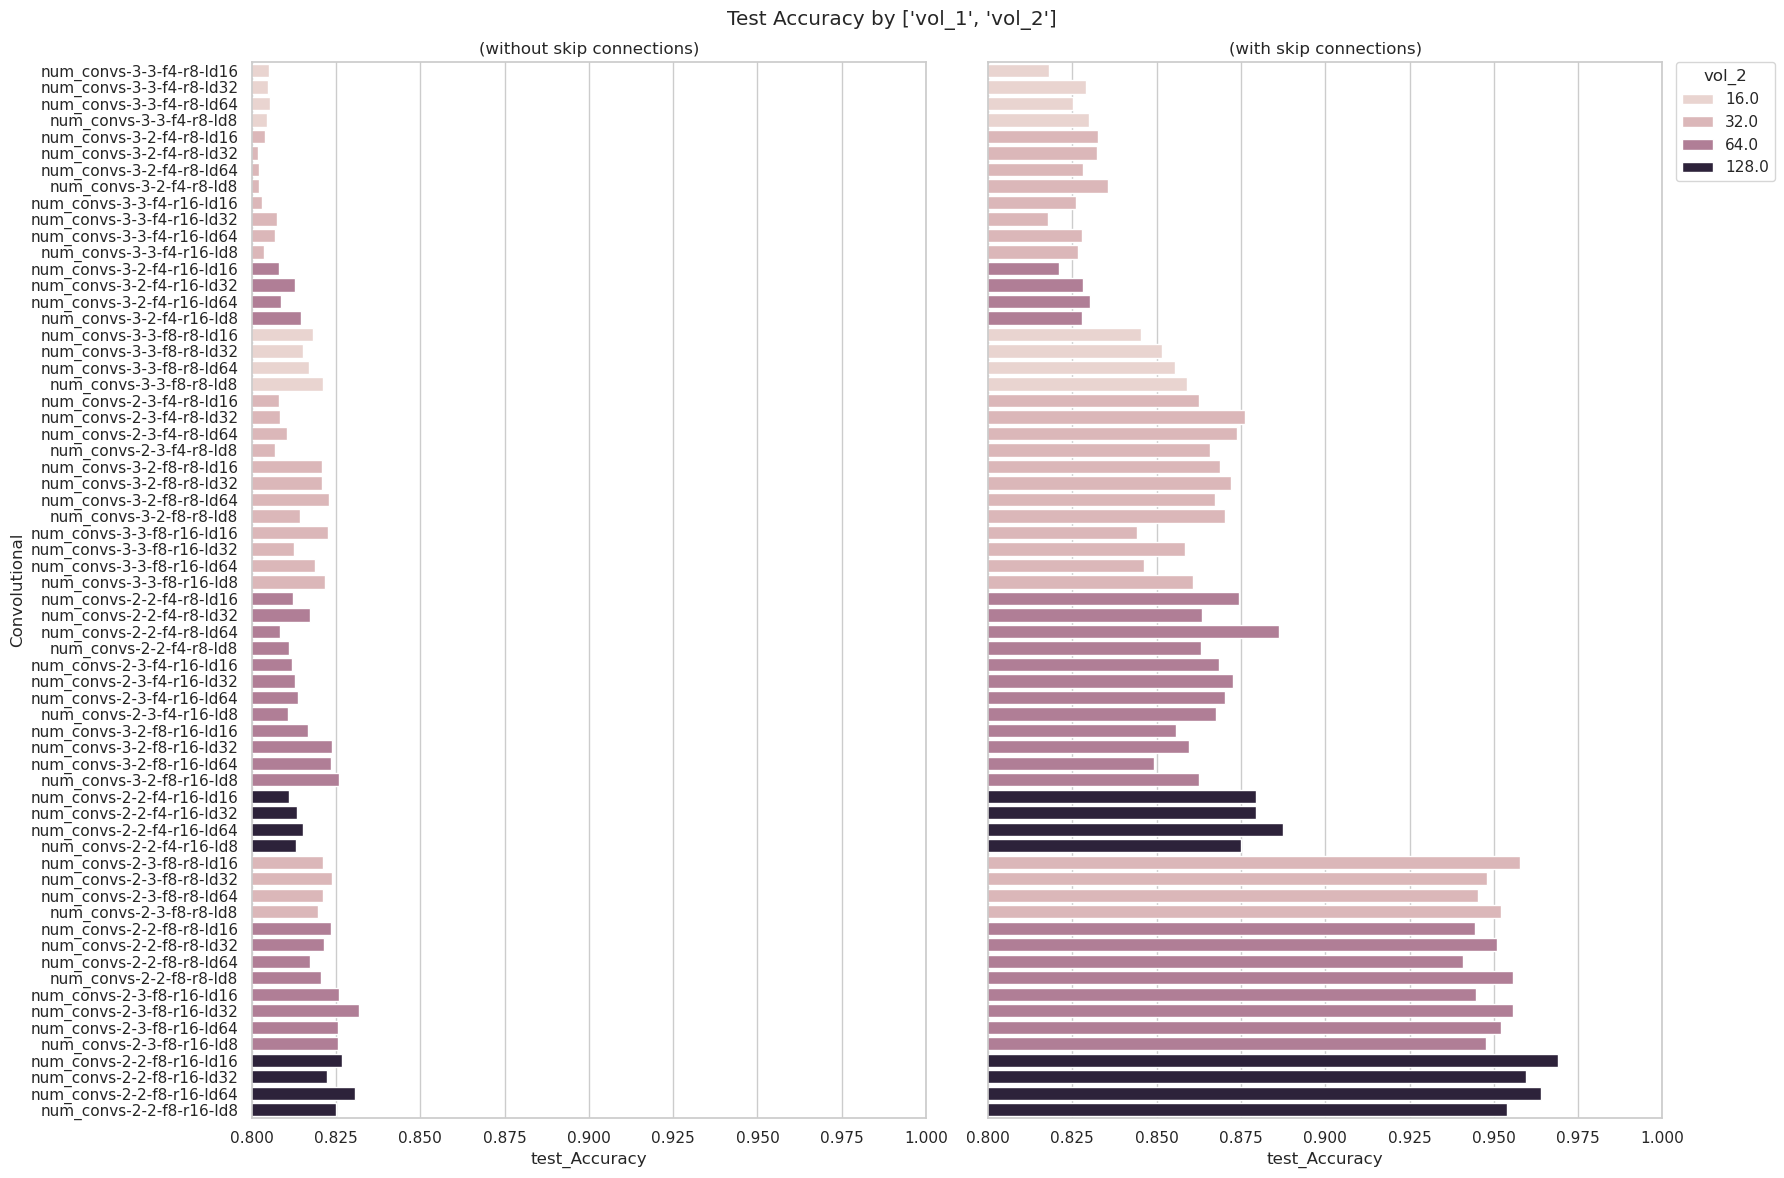

<Figure size 640x480 with 0 Axes>

In [100]:
order = [
    "vol_1",
    "vol_2",
]
hue = "vol_2"

fig, axes = plt.subplots(1, 2, figsize=(18, 12), sharex=True)
g = sns.barplot(
    data=data_c_no_skips.sort_values(by=order),
    x="test_Accuracy",
    y="name",
    hue=hue,
    legend=False,
    ax=axes[0],
)
g.set_title("(without skip connections)")
g.set_xlim([0.8, 1])

g.set(ylabel="Convolutional")

g = sns.barplot(
    data=data_c_skips.sort_values(by=order),
    x="test_Accuracy",
    y="name",
    hue=hue,
    ax=axes[1],
)
g.set_title("(with skip connections)")
g.legend(title=hue, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel="")

g.set_xlim([0.8, 1])
fig.suptitle(f"Test Accuracy by {order}")
fig.tight_layout()
plt.show()
plt.clf()

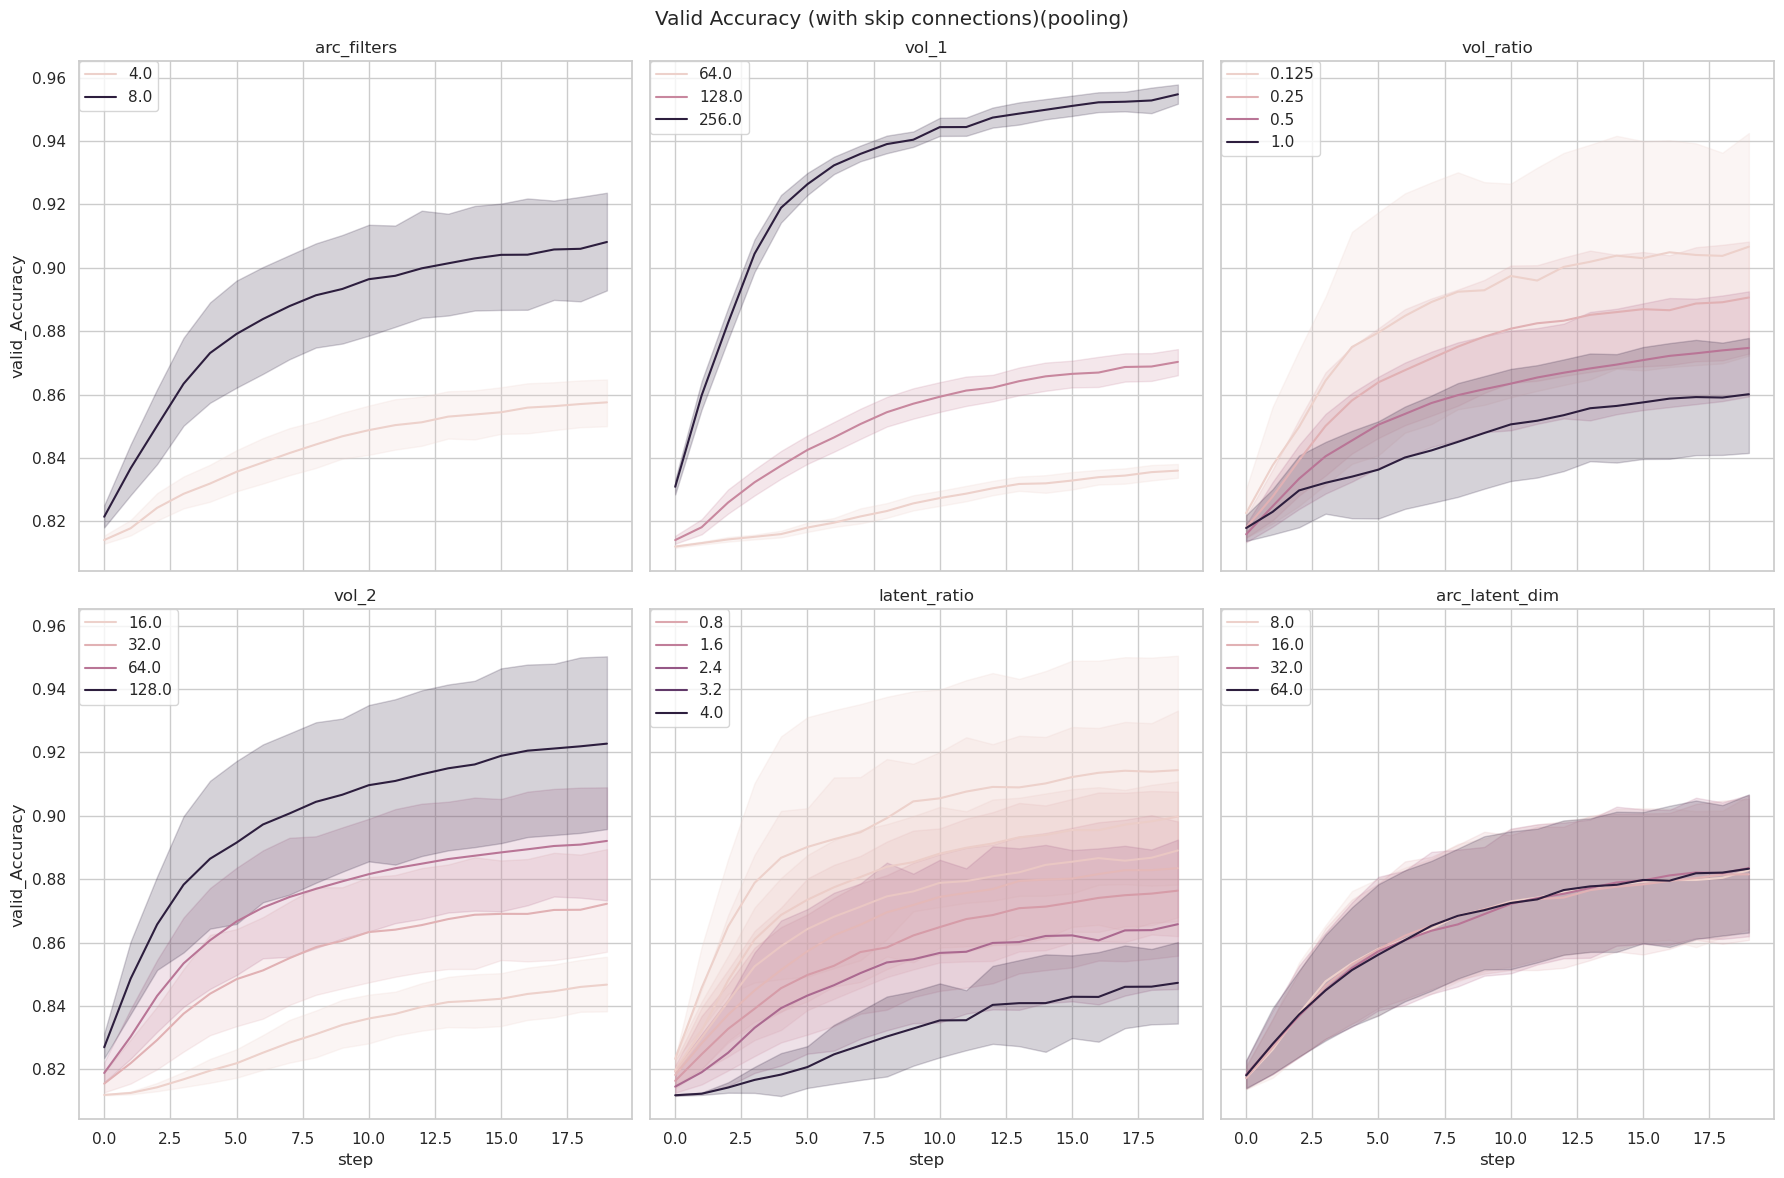

In [101]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), sharey=True, sharex=True)
hues = ["arc_filters", "vol_1", "vol_ratio"]
for i, hue in enumerate(hues):
    g = sns.lineplot(
        data=metrics_skips,
        x="step",
        y="valid_Accuracy",
        hue=hue,
        ax=ax[0, i],
    )

    g.legend(loc="upper left", borderaxespad=0.0)
    g.set_title(f"{hue}")


hues = ["vol_2", "latent_ratio", "arc_latent_dim"]
for i, hue in enumerate(hues):
    f = sns.lineplot(
        data=metrics_skips,
        x="step",
        y="valid_Accuracy",
        hue=hue,
        ax=ax[1, i],
    )
    f.legend(loc="upper left", borderaxespad=0.0)
    f.set_title(f"{hue}")


fig.suptitle("Valid Accuracy (with skip connections)(pooling)")
fig.tight_layout()

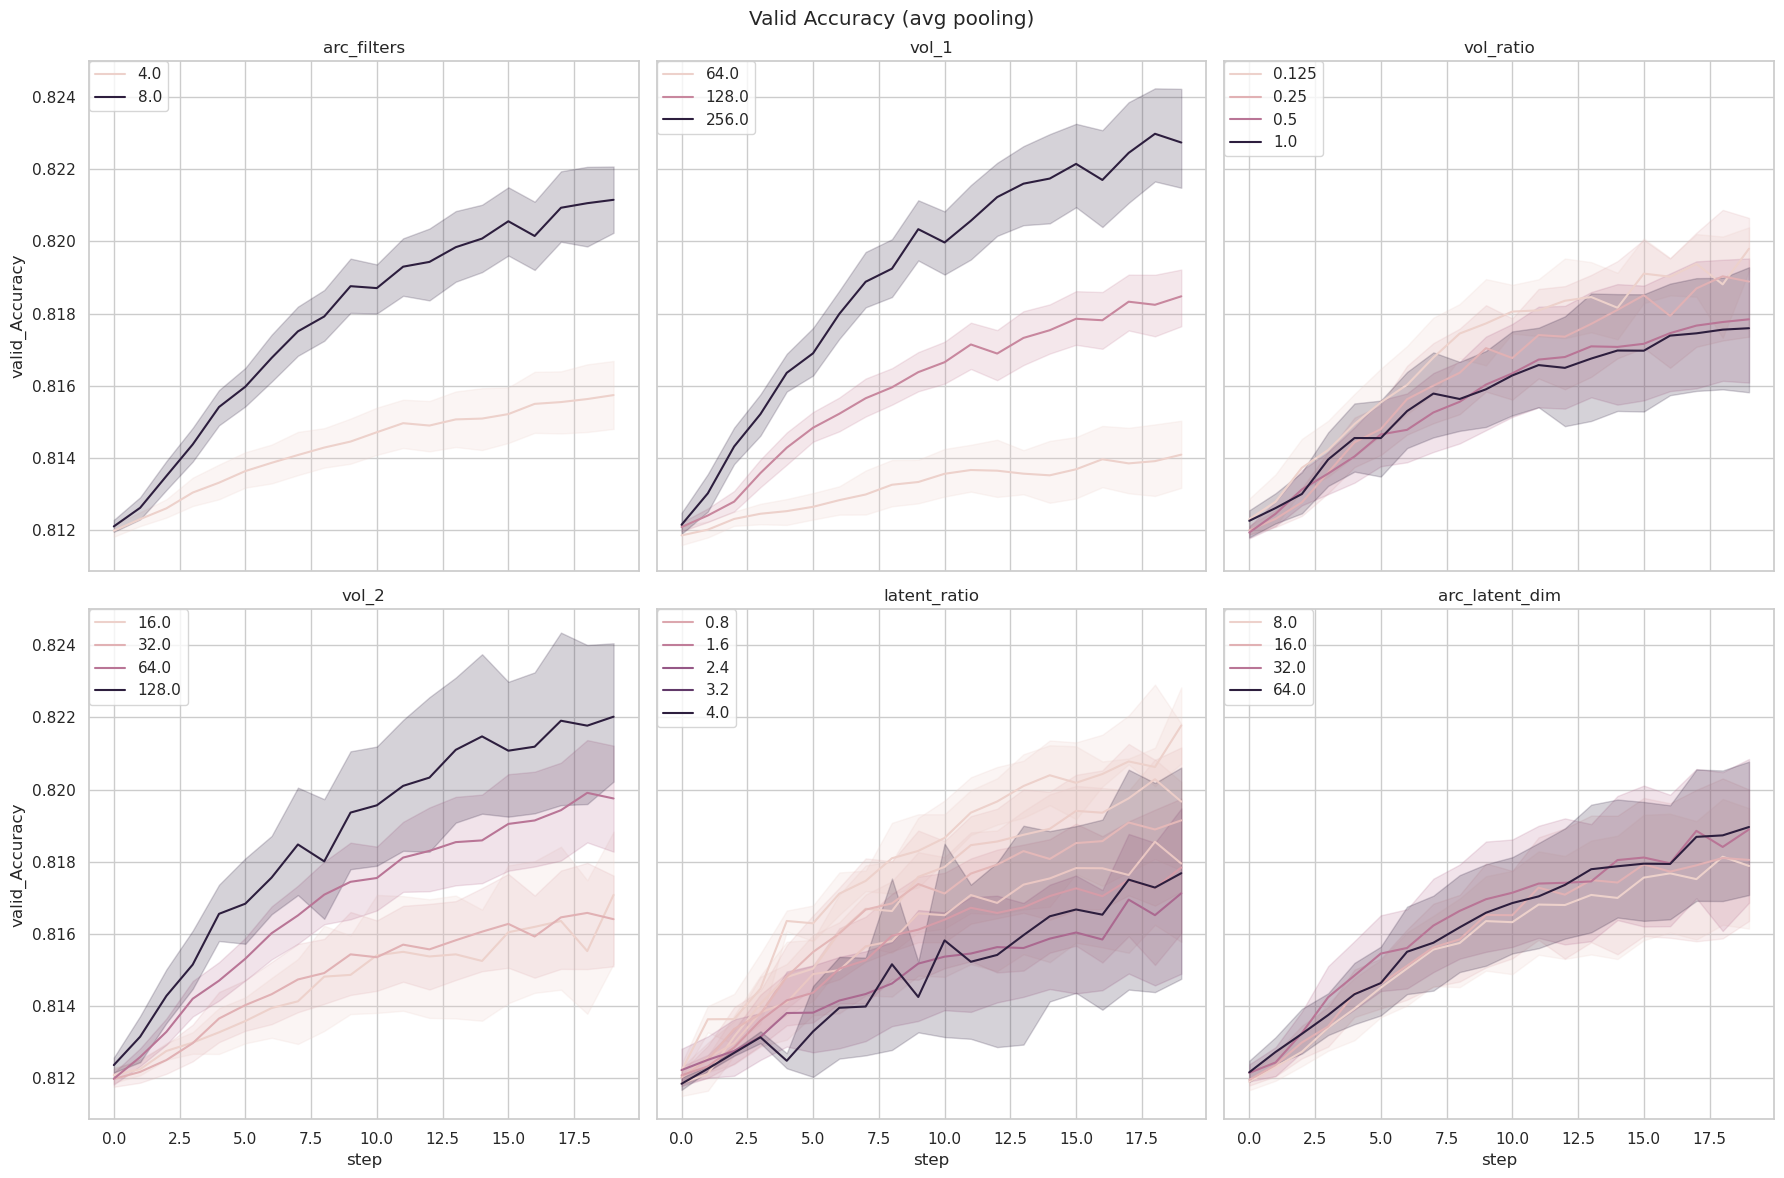

In [102]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12), sharey=True, sharex=True)
hues = ["arc_filters", "vol_1", "vol_ratio"]
for i, hue in enumerate(hues):
    g = sns.lineplot(
        data=metrics_no_skips,
        x="step",
        y="valid_Accuracy",
        hue=hue,
        ax=ax[0, i],
    )

    g.legend(loc="upper left", borderaxespad=0.0)
    g.set_title(f"{hue}")


hues = ["vol_2", "latent_ratio", "arc_latent_dim"]
for i, hue in enumerate(hues):
    f = sns.lineplot(
        data=metrics_no_skips,
        x="step",
        y="valid_Accuracy",
        hue=hue,
        ax=ax[1, i],
    )

    f.legend(loc="upper left", borderaxespad=0.0)
    f.set_title(f"{hue}")


fig.suptitle("Valid Accuracy (avg pooling)")
fig.tight_layout()

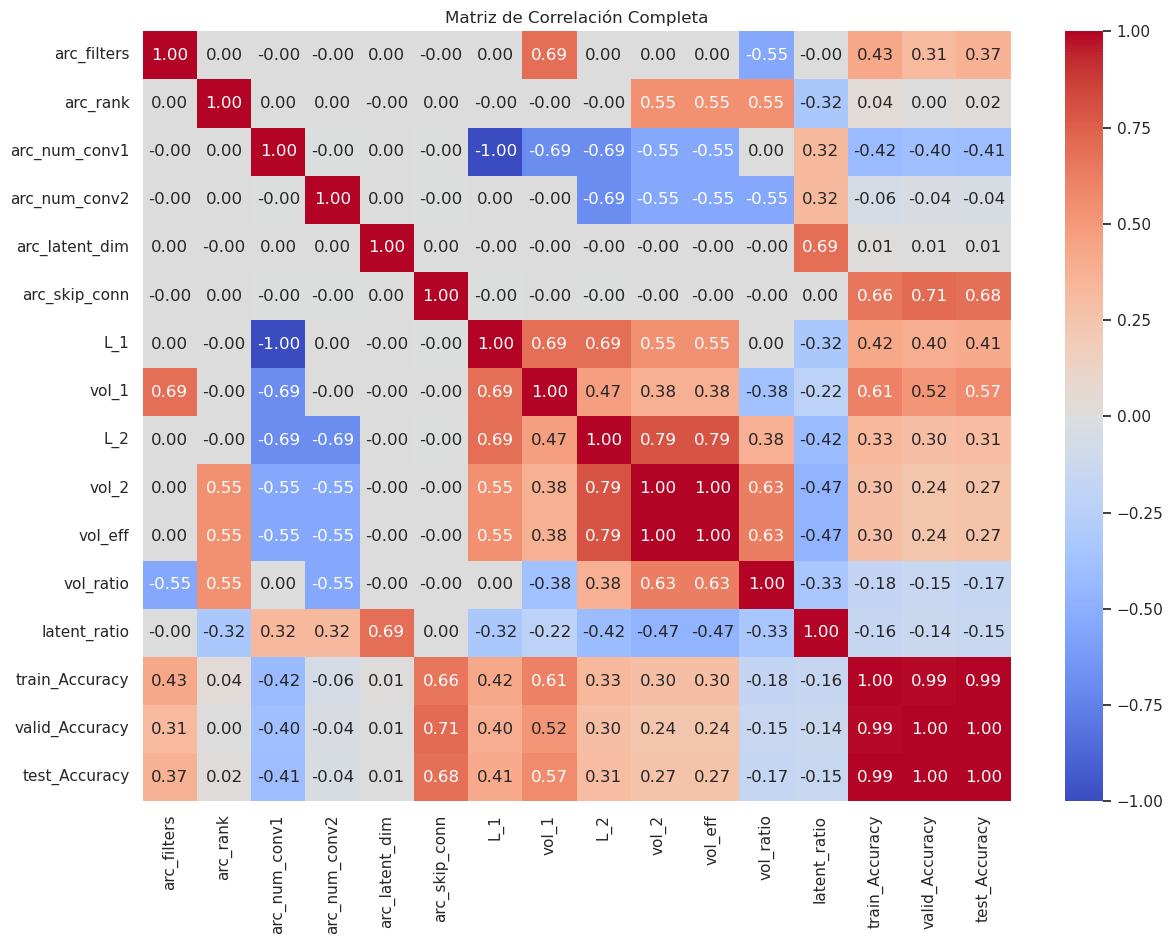

In [11]:
# Seleccionar un subconjunto de variables importantes:
# Variables de arquitectura e hiperparámetros
cols_arq = [
    "arc_filters",
    "arc_rank",
    "arc_num_conv1",
    "arc_num_conv2",
    "arc_latent_dim",
    "arc_skip_conn",
]
# Variables de volumen/latencia
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

# Como 'arc_skip_conn' es categórica (0/1 o similar), la transformamos a numérica si es necesario
if data["arc_skip_conn"].dtype == "object":
    data["arc_skip_conn"] = data["arc_skip_conn"].astype("category").cat.codes

# Crear un DataFrame solo con las columnas de interés
df_subset = data[cols_arq + cols_vol + cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación Completa")
plt.show()

In [12]:
# Filtrar modelos según skip connection
data_skip0 = data[data["arc_skip_conn"] == 0]
data_skip1 = data[data["arc_skip_conn"] == 1]

print("Modelos sin Skip Connections:", data_skip0.shape[0])
print("Modelos con Skip Connections:", data_skip1.shape[0])

Modelos sin Skip Connections: 64
Modelos con Skip Connections: 64


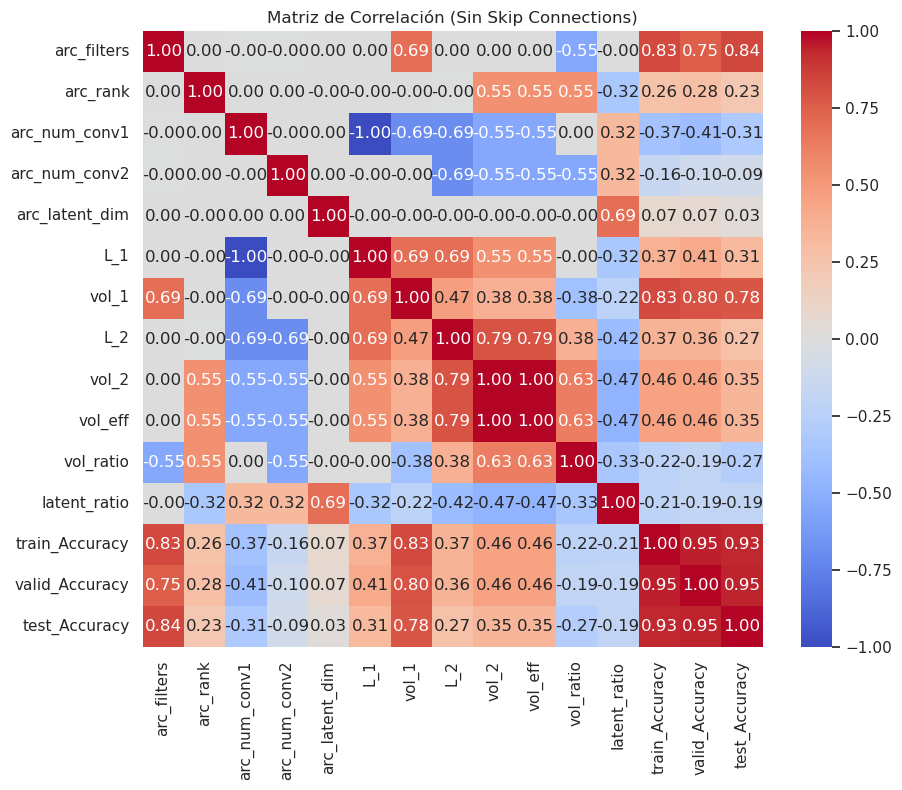

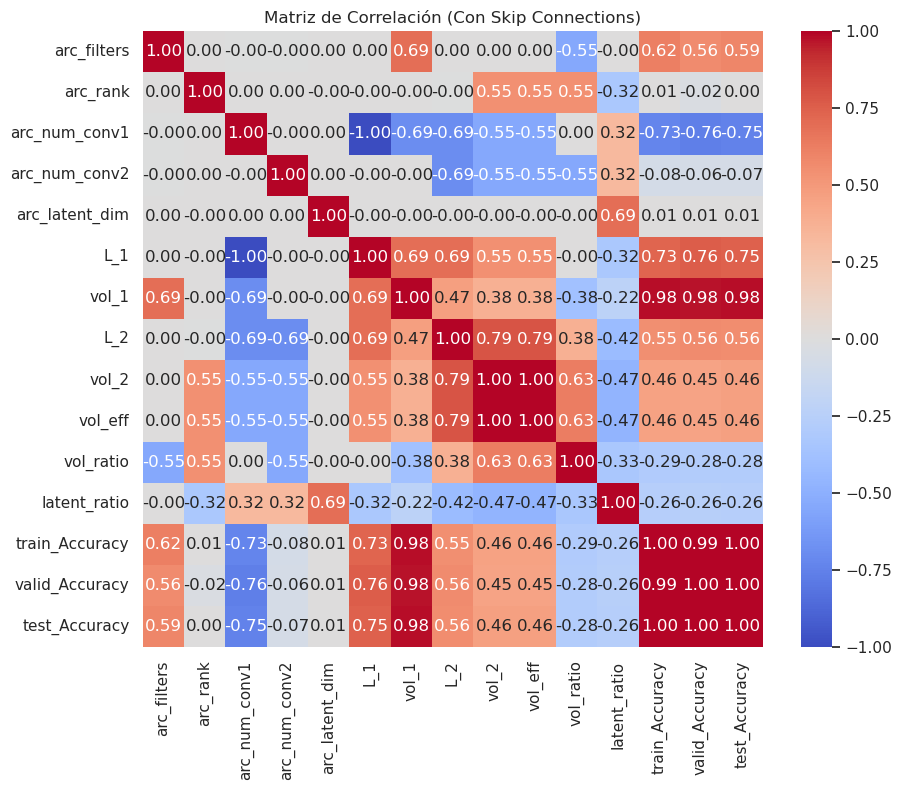

In [105]:
# Función para graficar la matriz de correlación
def graficar_correlacion(df, titulo):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(titulo)
    plt.show()


cols_arq = [
    "arc_filters",
    "arc_rank",
    "arc_num_conv1",
    "arc_num_conv2",
    "arc_latent_dim",
]
# Variables de volumen/latencia
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]
cols_interes = cols_arq + cols_vol + cols_perf
# Matriz para modelos sin skip
graficar_correlacion(
    data_skip0[cols_interes], "Matriz de Correlación (Sin Skip Connections)"
)

# Matriz para modelos con skip
graficar_correlacion(
    data_skip1[cols_interes], "Matriz de Correlación (Con Skip Connections)"
)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Listas de campos
cols_arq = [
    "arc_filters",
    "arc_rank",
    "arc_num_conv1",
    "arc_num_conv2",
    "arc_latent_dim",
    # "arc_skip_conn",
]
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
accuracy_field = "test_Accuracy"
fields = cols_arq + cols_vol


def plot_accuracy_by_fields(df, fields, accuracy_field, ncols=3, title_suffix=""):
    """
    Genera boxplots de la accuracy en función de cada campo.

    Parámetros:
      - df: DataFrame sobre el que graficar.
      - fields: Lista de campos a analizar.
      - accuracy_field: Campo de rendimiento (ej. test_Accuracy).
      - ncols: Número de columnas en la grilla de subplots.
      - title_suffix: Sufijo para incluir en cada título (ej. "(Con Skip)").
    """
    nfields = len(fields)
    nrows = (nfields + ncols - 1) // ncols  # redondeo hacia arriba
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5), sharey=True)
    axs = axs.flatten()

    for i, field in enumerate(fields):
        # Trabajamos sobre una copia para evitar modificar el DataFrame original
        df_tmp = df.copy()

        # Si la variable es numérica y tiene muchos valores únicos, se crean 4 bins
        if (
            pd.api.types.is_numeric_dtype(df_tmp[field])
            and df_tmp[field].nunique() > 10
        ):
            try:
                df_tmp["bin"] = pd.qcut(df_tmp[field], q=4, duplicates="drop")
            except Exception:
                df_tmp["bin"] = df_tmp[field]
        else:
            df_tmp["bin"] = df_tmp[field]

        sns.boxplot(
            x="bin",
            y=accuracy_field,
            data=df_tmp,
            ax=axs[i],
            palette="Set2",
        )
        axs[i].set_title(f"{accuracy_field} vs {field} {title_suffix}", fontsize=16)
        axs[i].set_xlabel(field, fontsize=14)
        axs[i].set_ylabel(accuracy_field, fontsize=14)
        axs[i].tick_params(axis="x", rotation=45, labelsize=14)
        axs[i].tick_params(axis="y", labelsize=14)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


# Filtrar el DataFrame según la presencia de skip connections
data_skip = data[data["arc_skip_conn"] == 1]
data_no_skip = data[data["arc_skip_conn"] == 0]

/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWa

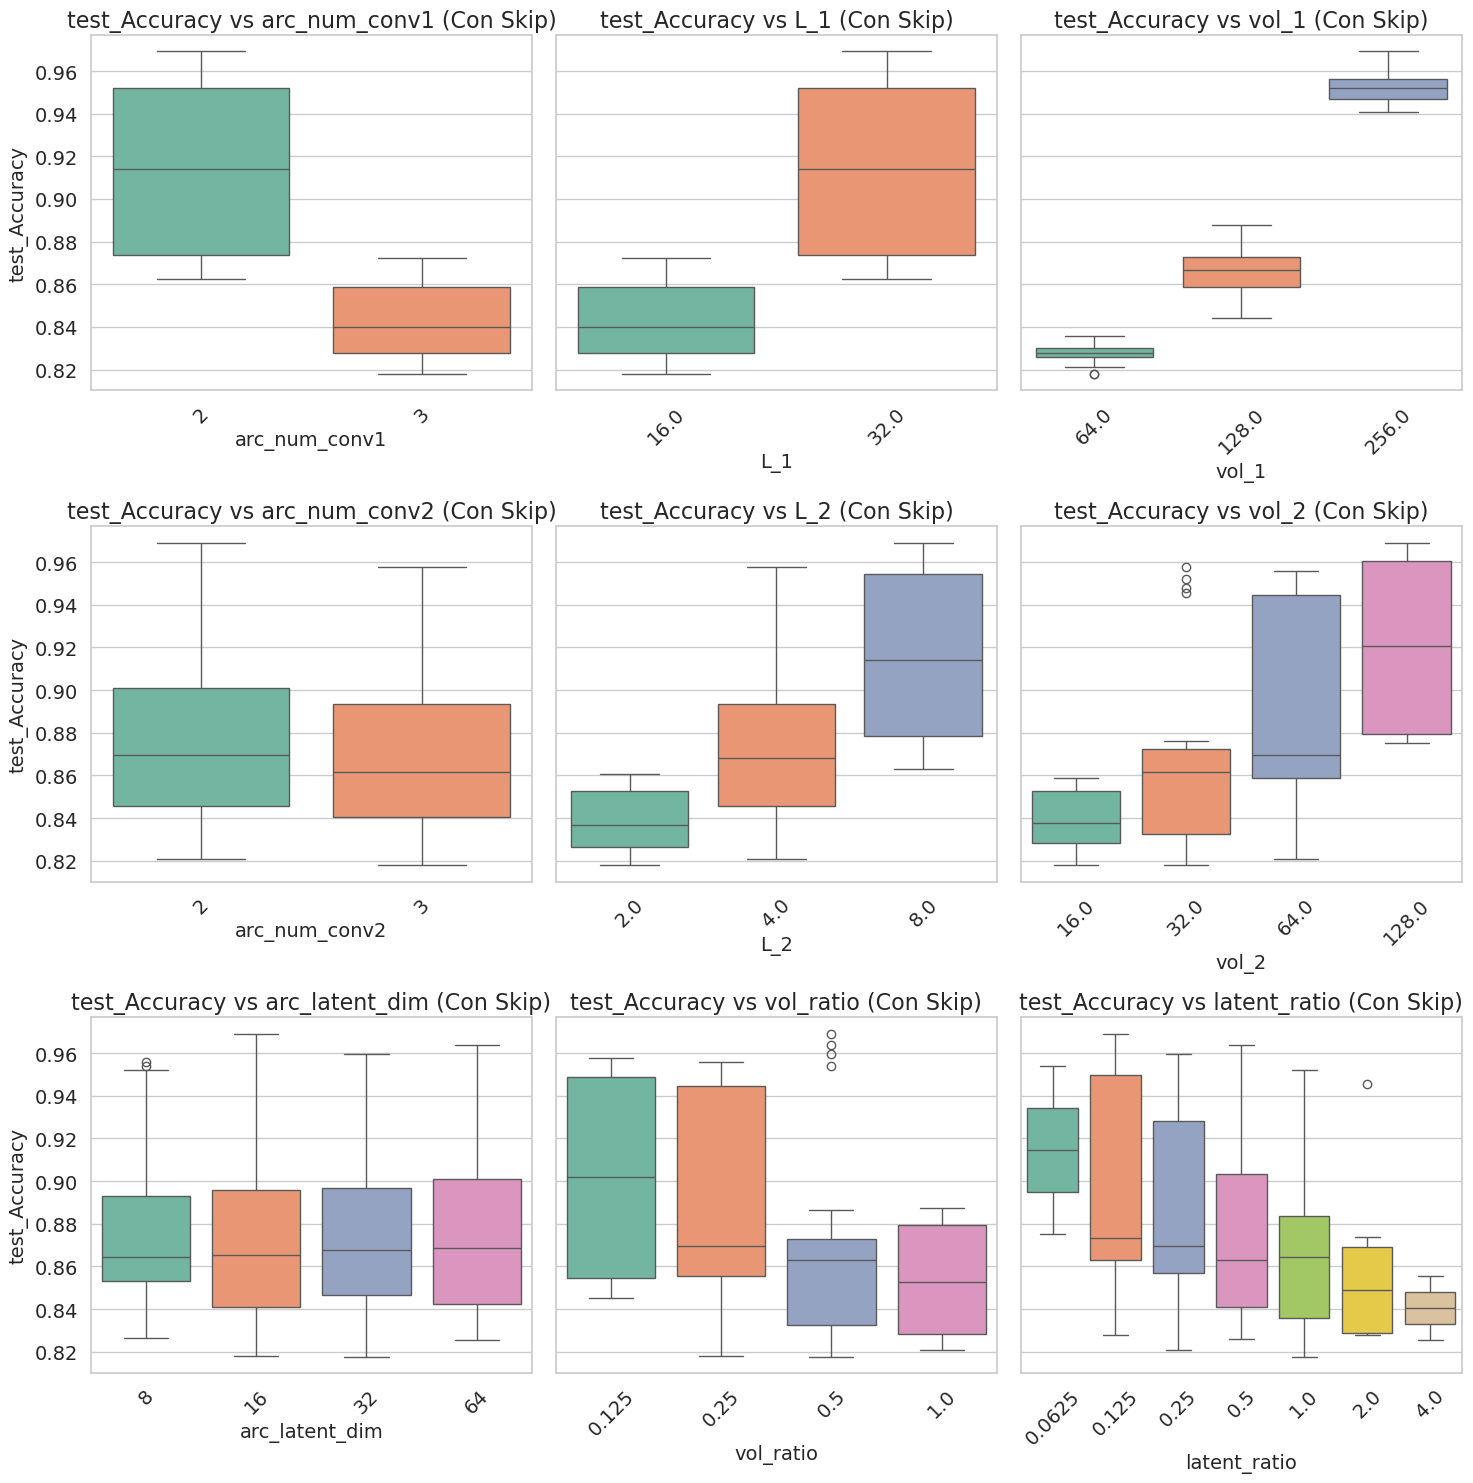

/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_770067/2258342050.py:51: FutureWa

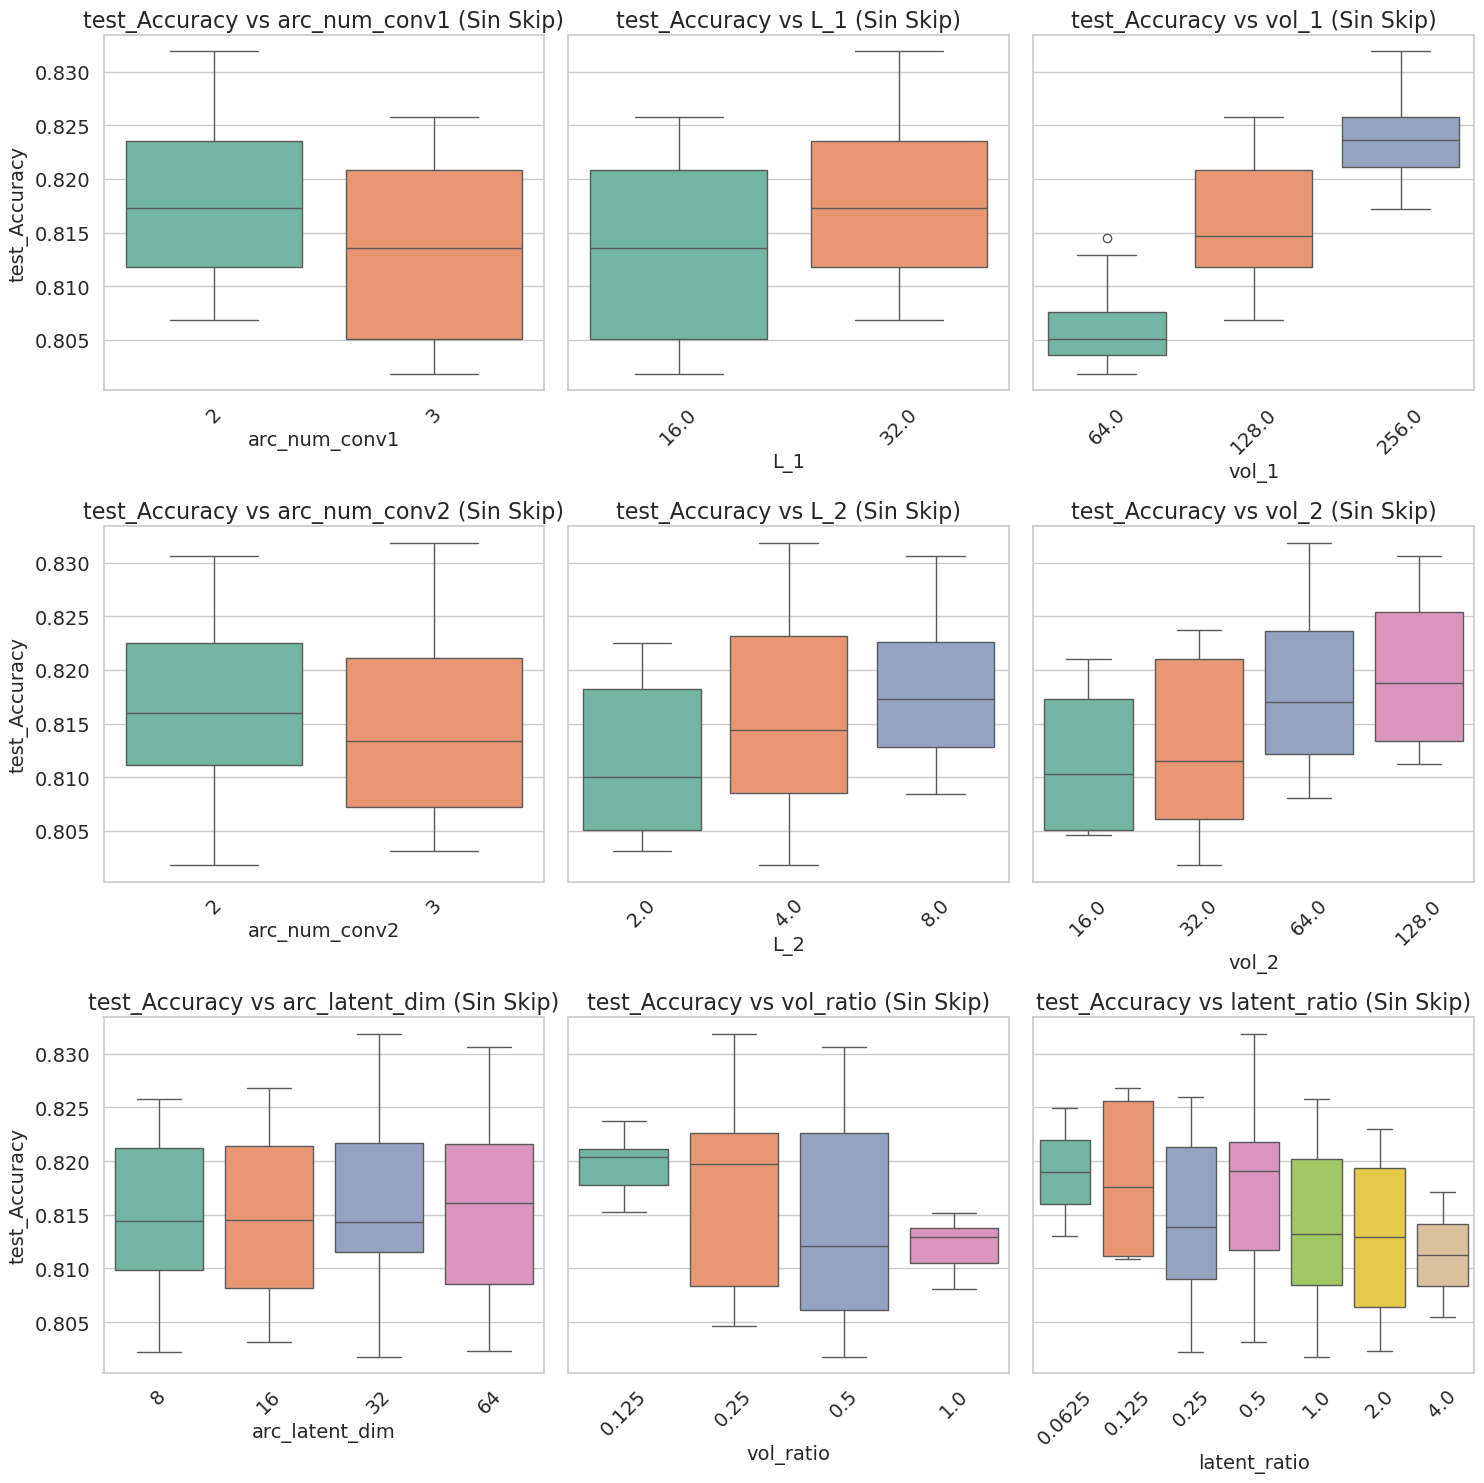

In [20]:
fields = [
    "arc_num_conv1",
    "L_1",
    "vol_1",
    "arc_num_conv2",
    "L_2",
    "vol_2",
    "arc_latent_dim",
    "vol_ratio",
    "latent_ratio",
] 

# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    data_skip, fields, accuracy_field, ncols=3, title_suffix="(Con Skip)"
)
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_no_skip, fields, accuracy_field, ncols=3, title_suffix="(Sin Skip)"
)

In [115]:
df = (
    data.query("vol_1 == 256 & vol_2 == 64 ")
    .sort_values("test_Accuracy", ascending=False)[
        [
            "name",
            "arc_skip_conn",
            "arc_num_conv1",
            "arc_num_conv2",
            "arc_latent_dim",
            "vol_1",
            "vol_2",
            "train_Accuracy",
            "valid_Accuracy",
            "test_Accuracy",
        ]
    ]
    .head(20)
)

df.sort_values("arc_num_conv2", ascending=False)

,name,arc_skip_conn,arc_num_conv1,arc_num_conv2,arc_latent_dim,vol_1,vol_2,train_Accuracy,valid_Accuracy,test_Accuracy
89,num_convs-2-3-f8-r16-ld32,1,2,3,32,256.0,64.0,0.966945,0.958377,0.955693
90,num_convs-2-3-f8-r16-ld64,1,2,3,64,256.0,64.0,0.960749,0.952786,0.952249
91,num_convs-2-3-f8-r16-ld8,1,2,3,8,256.0,64.0,0.958850,0.948790,0.947535
88,num_convs-2-3-f8-r16-ld16,1,2,3,16,256.0,64.0,0.956837,0.946100,0.944782
25,num_convs-2-3-f8-r16-ld32,0,2,3,32,256.0,64.0,0.840717,0.828364,0.831871
24,num_convs-2-3-f8-r16-ld16,0,2,3,16,256.0,64.0,0.840038,0.825713,0.825936
26,num_convs-2-3-f8-r16-ld64,0,2,3,64,256.0,64.0,0.836657,0.823113,0.825751
27,num_convs-2-3-f8-r16-ld8,0,2,3,8,256.0,64.0,0.836301,0.825016,0.825566
79,num_convs-2-2-f8-r8-ld8,1,2,2,8,256.0,64.0,0.964686,0.959622,0.955634
77,num_convs-2-2-f8-r8-ld32,1,2,2,32,256.0,64.0,0.959250,0.957410,0.950810


(0.8, 1.0)

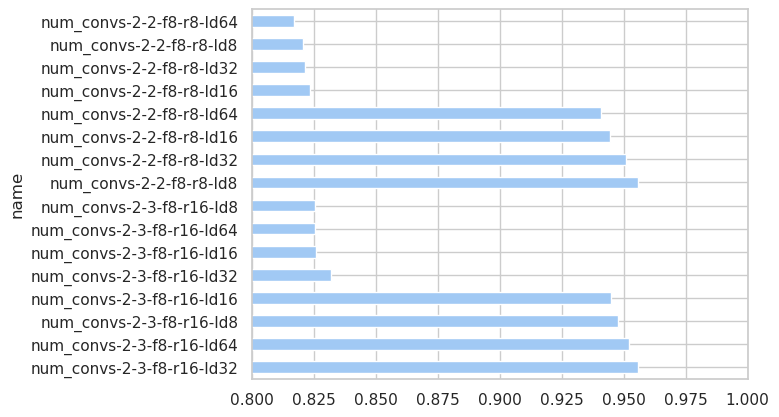

In [124]:
df.sort_values("arc_num_conv2", ascending=False).plot(
    kind="barh", x="name", y="test_Accuracy", legend=None
).set_xlim(0.8, 1)

In [109]:
data.query("vol_1 == 256 & arc_num_conv2 == 3 & arc_skip_conn == 1").sort_values(
    "test_Accuracy", ascending=False
).name

### NO SKIP CONNECTIONS
# 25    num_convs-2-3-f8-r16-ld32
# 24    num_convs-2-3-f8-r16-ld16
# 26    num_convs-2-3-f8-r16-ld64
# 27     num_convs-2-3-f8-r16-ld8
# 29     num_convs-2-3-f8-r8-ld32
# 30     num_convs-2-3-f8-r8-ld64
# 28     num_convs-2-3-f8-r8-ld16
# 31      num_convs-2-3-f8-r8-ld8
# Name: name, dtype: object

### SKIP CONNECTIONS
# 92    num_convs-2-3-f8-r8-ld16
# 89    num_convs-2-3-f8-r16-ld32
# 90    num_convs-2-3-f8-r16-ld64
# 95      num_convs-2-3-f8-r8-ld8
# 93     num_convs-2-3-f8-r8-ld32
# 91     num_convs-2-3-f8-r16-ld8
# 94     num_convs-2-3-f8-r8-ld64
# 88    num_convs-2-3-f8-r16-ld16
# Name: name, dtype: object

92     num_convs-2-3-f8-r8-ld16
89    num_convs-2-3-f8-r16-ld32
90    num_convs-2-3-f8-r16-ld64
95      num_convs-2-3-f8-r8-ld8
93     num_convs-2-3-f8-r8-ld32
91     num_convs-2-3-f8-r16-ld8
94     num_convs-2-3-f8-r8-ld64
88    num_convs-2-3-f8-r16-ld16
Name: name, dtype: object

In [110]:
data.query("name == 'num_convs-2-3-f8-r8-ld32'")

,run_uuid,name,best_epoch,arc_filters,arc_rank,arc_kernel,arc_stride_1,arc_stride_2,arc_num_conv1,arc_num_conv2,arc_latent_dim,arc_skip_conn,hyp_lr,hyp_output_th,hyp_scheduler,best_epoch.1,train_loss,train_Accuracy,train_Accuracy_seq,train_F1,valid_loss,valid_Accuracy,valid_Accuracy_seq,valid_F1,test_loss,test_Accuracy,test_Accuracy_seq,test_F1,L_1,vol_1,L_2,vol_2,vol_eff,vol_ratio,latent_ratio
29,a5bc8c7d157649cc87e3e5dab56246b7,num_convs-2-3-f8-r8-ld32,18,8,8,3,2,2,2,3,32,0,0.001,0.5,none,18,0.129045,0.82695,0.0,0.786028,0.134658,0.821598,0.0,0.767301,0.133399,0.823764,0.0,0.779859,32.0,256.0,4.0,32.0,0.0625,0.125,1.0
93,c32ca64e6ca44e459d980a92b63ea8b0,num_convs-2-3-f8-r8-ld32,18,8,8,3,2,2,2,3,32,1,0.001,0.5,none,18,0.038313,0.95706,0.0,0.956267,0.039521,0.953105,0.0,0.952141,0.042338,0.947922,0.0,0.946946,32.0,256.0,4.0,32.0,0.0625,0.125,1.0
